https://stepik.org/lesson/1370126/step/2

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_43_adaboost_regression.py

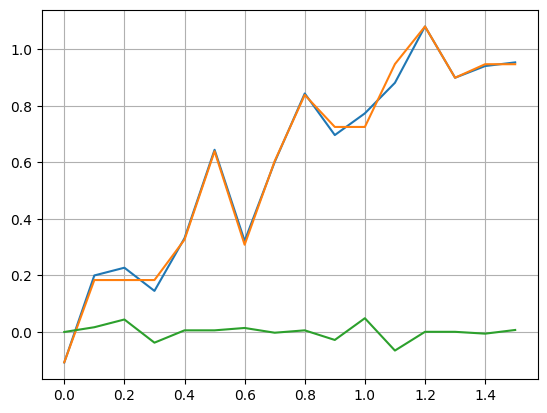

In [ ]:
# Алгоритм регрессии AdaBoost на решающих деревьях

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

np.random.seed(123)

x = np.arange(0, np.pi/2, 0.1).reshape(-1, 1)
y = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# plt.plot(x, y)
# plt.grid()
# plt.show()

T = 5                   # число алгоритмов в композиции
max_depth = 2           # максимальная глубина решающих деревьев
algs = []               # список из полученных алгоритмов
s = np.array(y.ravel())
for n in range(T):
    # создаем и обучаем решающее дерево
    algs.append(DecisionTreeRegressor(max_depth=max_depth))
    algs[-1].fit(x, s)

    s -= algs[-1].predict(x)    # пересчитываем остатки


# восстанавливаем исходный сигнал по набору полученных деревьев
yy = algs[0].predict(x)
for n in range(1, T):
    yy += algs[n].predict(x)

# отображаем результаты в виде графиков
plt.plot(x, y)      # исходный график
plt.plot(x, yy)     # восстановленный график
plt.plot(x, s)      # остаточный сигнал
plt.grid()
plt.show()

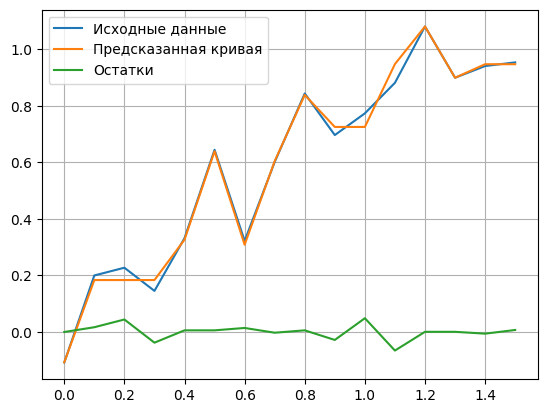

In [ ]:
# @title Реализация алгоритма AdaBoost для регрессии на основе решающих деревьев

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

np.random.seed(123)

# Данные
x = np.arange(0, np.pi/2, 0.1).reshape(-1, 1) # массив значений x
y = np.sin(x) + np.random.normal(0, 0.1, x.shape)  # Истинная функция + шум

# Параметры
T = 5           # Количество базовых моделей (решающих деревьев)
max_depth = 2   # Ограничение глубины деревьев
algs = []       # Список для хранения обученных моделей
s = np.array(y.ravel()) # Начальные остатки (изначально равны целевым значениям),
                        # форму (N, 1) преввращаем в (N)

# Итеративное обучение деревьев на остатках
for n in range(T):
    tree = DecisionTreeRegressor(max_depth=max_depth)  # Создаем дерево
    tree.fit(x, s)      # Обучаем на текущих остатках
    algs.append(tree)   # Сохраняем модель
    s -= tree.predict(x)  # Обновляем остатки, вычитая предсказания модели

# Восстанавливаем предсказания, суммируя результаты всех деревьев
yy = np.zeros_like(y.ravel())  # Инициализируем массив предсказаний
for tree in algs:
    yy += tree.predict(x)  # Добавляем предсказания каждого дерева

# Визуализация результатов
plt.plot(x, y, label="Исходные данные")  # Исходный график
plt.plot(x, yy, label="Предсказанная кривая")  # Восстановленный график
plt.plot(x, s, label="Остатки")  # Остаточный сигнал
plt.legend()
plt.grid()
plt.show()
